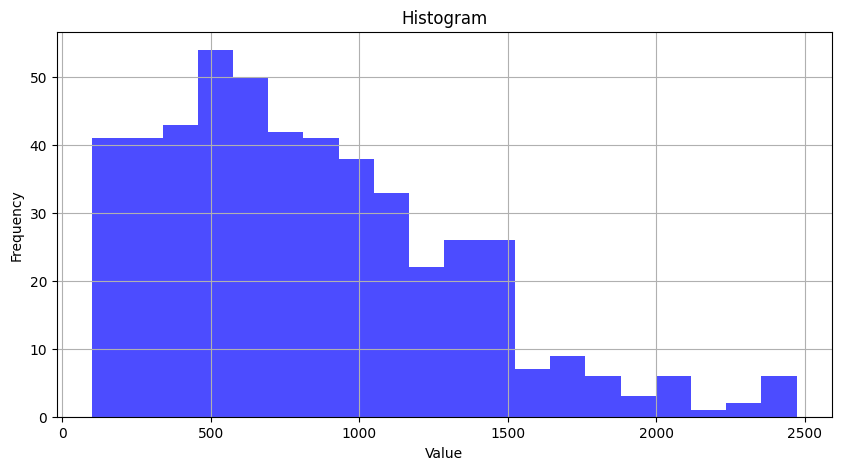

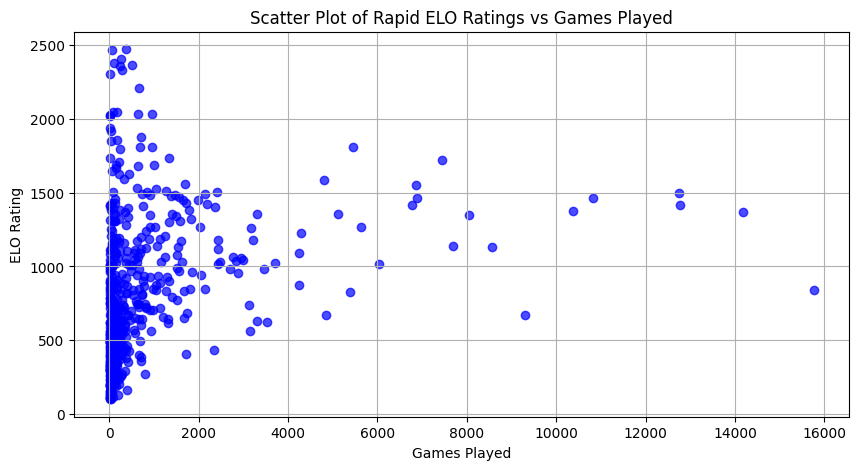

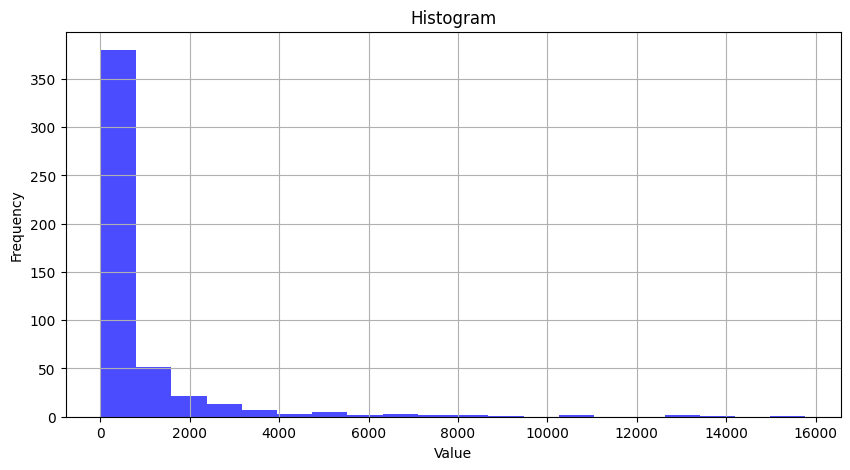

The stats (mean, std dev, median, count) of Rapid ELO from the file is:
[829.0442655935614, 493.5451620818508, 740.0, 497]


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def calculate_stats_elo(filename):
    with open(filename, 'r') as file:
        elos = []
        games = []
        for line in file:
            parts1 = line.split("Rapid ELO: ")
            parts2 = line.split("Games Played: ")
            if len(parts1) > 1 and len(parts2) > 1:
                elo_str = parts1[1].split(",")[0].strip()
                games_str = parts2[1].split(",")[0].strip()
                if elo_str.isdigit() and games_str.isdigit() and int(games_str) > 10:
                    elos.append(int(elo_str))
                    games.append(int(games_str))

        if elos:
            stats = []
            mean_elo = np.mean(elos)
            std_elo = np.std(elos)
            med_elo = np.median(elos)
            num_elo = len(elos)
            stats.append(mean_elo)
            stats.append(std_elo)
            stats.append(med_elo)
            stats.append(num_elo)
            
            plot_histogram(elos)  # Call to plot the histogram
            plot_scatterplot(games, elos)
            plot_histogram(games)
            
            # Create DataFrame with paired ELO ratings and games played
            df = pd.DataFrame({'Games Played': games, 'Rapid ELO': elos})
            df.to_csv('file.csv', index=False)
            
            return stats 
        else:
            return "No valid ELO data found."

def plot_histogram(data):
    plt.figure(figsize=(10, 5))  # Set the size of the plot
    plt.hist(data, bins=20, color='blue', alpha=0.7)  # Create a histogram with 20 bins
    plt.title('Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()  # Display the histogram

def plot_scatterplot(games, elos):
    plt.figure(figsize=(10, 5))  # Set the size of the plot
    plt.scatter(games, elos, color='blue', alpha=0.7)  # Scatter plot including zeros
    plt.title('Scatter Plot of Rapid ELO Ratings vs Games Played')
    plt.xlabel('Games Played')
    plt.ylabel('ELO Rating')
    plt.grid(True)
    plt.show()  # Display the scatter plot

# Example usage
filename = 'data_new.txt'
stats_elo = calculate_stats_elo(filename)
print("The stats (mean, std dev, median, count) of Rapid ELO from the file is:")
print(stats_elo)
